# Step1:Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
import pandas as pd

# Try reading the file with utf-8 encoding
try:
    spam_data = pd.read_csv("C:/Users/Admin/Downloads/enron_spam_data (1).csv", encoding='utf-8')
except UnicodeDecodeError:
    # If there's a UnicodeDecodeError, try reading with 'latin1' encoding
    spam_data = pd.read_csv("C:/Users/Admin/Downloads/enron_spam_data (1).csv", encoding='latin1')



In [3]:
spam_data

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [4]:
spam_data.shape

(33716, 5)

In [5]:
spam_data.columns

Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')

In [6]:
spam_data.describe()

,Message ID
count,33716.000000
mean,16857.500000
std,9733.115174
min,0.000000
25%,8428.750000
50%,16857.500000
75%,25286.250000
max,33715.000000


In [7]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [8]:
spam_data.isnull().sum()

Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64

In [9]:
spam_data.duplicated().sum()

0

In [10]:
spam_data.kurtosis()

C:\Users\Admin\AppData\Local\Temp/ipykernel_10776/3570851374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spam_data.kurtosis()


Message ID   -1.2
dtype: float64

In [11]:
spam_data.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_10776/86364205.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spam_data.skew()


Message ID    0.0
dtype: float64

# Step 2:Data Cleaning

In [12]:
# Store original cleaned text data for later
original_cleaned_data = spam_data[['Subject', 'Message']].copy()

# Columns to be cleaned
cleaned_columns = ['Subject', 'Message']

# Convert columns to numeric (if necessary)
spam_data['Subject'] = pd.to_numeric(spam_data['Subject'], errors='coerce')
spam_data['Message'] = pd.to_numeric(spam_data['Message'], errors='coerce')

# Fill null values with mean (for demonstration)

for col in cleaned_columns:
    mean_value=spam_data[col].mean()
    spam_data[col].fillna(mean_value,inplace=True)

# Print null values after imputation
print("Null values in spam data after imputation:")
print(spam_data.isnull().sum())

# Revert numeric columns back to original cleaned text format
spam_data[['Subject', 'Message']] = original_cleaned_data

# Verify columns reverted to text format without null values
cleaned_spam_data = spam_data.dropna(subset=['Subject', 'Message'])

# Print cleaned spam_data
print("\nCleaned spam_data without null values:")
cleaned_spam_data


Null values in spam data after imputation:
Message ID    0
Subject       0
Message       0
Spam/Ham      0
Date          0
dtype: int64

Cleaned spam_data without null values:


,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [13]:
cleaned_spam_data['Spam/Ham'].value_counts()

spam    16614
ham     16493
Name: Spam/Ham, dtype: int64

# Step 3: EDA(Exploratory Data Analysis)

In [14]:
cleaned_spam_data.columns

Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')

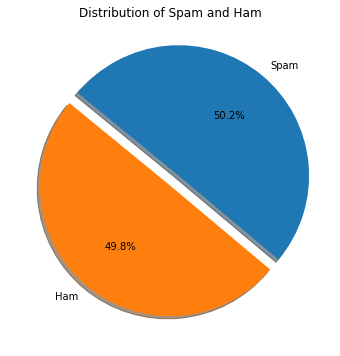

In [15]:
spam_counts=cleaned_spam_data['Spam/Ham'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(spam_counts,labels=['Spam','Ham'],autopct='%1.1f%%',startangle=1400,shadow=True,explode=(0.1,0))
plt.title('Distribution of Spam and Ham')
plt.show()

In [16]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


C:\Users\Admin\AppData\Local\Temp/ipykernel_10776/909341510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_spam_data['text_len'] = cleaned_spam_data['Message'].apply(len)


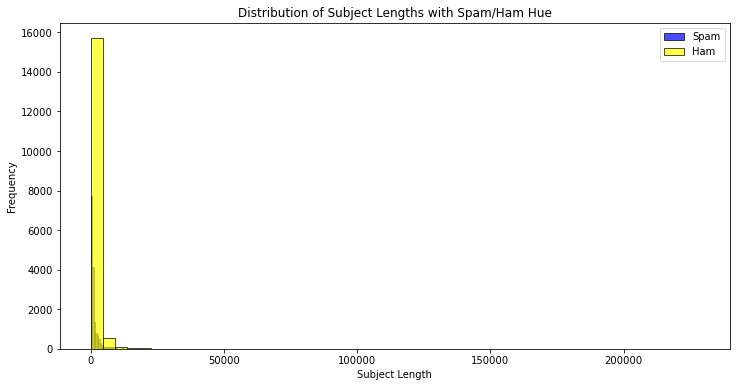

In [27]:
# Calculate the length of each subject
cleaned_spam_data['text_len'] = cleaned_spam_data['Message'].apply(len)

# Separate spam and ham emails
spam_email = cleaned_spam_data[cleaned_spam_data['Spam/Ham'] == 'spam']
ham_email = cleaned_spam_data[cleaned_spam_data['Spam/Ham'] == 'ham']

# Plot the stacked histogram of subject lengths
plt.figure(figsize=(12, 6))
plt.hist(spam_email['text_len'], bins=50, color='Blue', alpha=0.7, label='Spam', edgecolor='black', stacked=True)
plt.hist(ham_email['text_len'], bins=50, color='yellow', alpha=0.7, label='Ham', edgecolor='black', stacked=True)
#plt.hist([spam_email['text_length'], ham_email['text_length']], bins=50, color=['red', 'green'], alpha=0.7, label=['Spam', 'Ham'], edgecolor='black', stacked=True)

plt.title('Distribution of Subject Lengths with Spam/Ham Hue')
plt.xlabel('Subject Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


C:\Users\Admin\AppData\Local\Temp/ipykernel_10776/180065396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_spam_data['text_length'] = cleaned_spam_data['Subject'].apply(len)


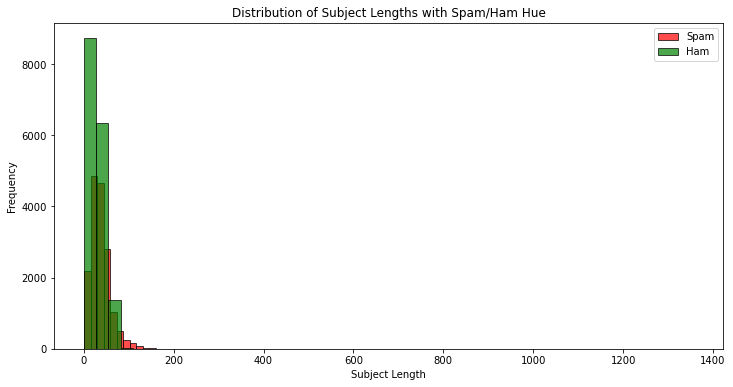

In [23]:
import matplotlib.pyplot as plt

# Calculate the length of each subject
cleaned_spam_data['text_length'] = cleaned_spam_data['Subject'].apply(len)

# Separate spam and ham emails
spam_email = cleaned_spam_data[cleaned_spam_data['Spam/Ham'] == 'spam']
ham_email = cleaned_spam_data[cleaned_spam_data['Spam/Ham'] == 'ham']

# Plot the stacked histogram of subject lengths
plt.figure(figsize=(12, 6))
plt.hist(spam_email['text_length'], bins=50, color='red', alpha=0.7, label='Spam', edgecolor='black', stacked=True)
plt.hist(ham_email['text_length'], bins=50, color='green', alpha=0.7, label='Ham', edgecolor='black', stacked=True)
#plt.hist([spam_email['text_length'], ham_email['text_length']], bins=50, color=['red', 'green'], alpha=0.7, label=['Spam', 'Ham'], edgecolor='black', stacked=True)

plt.title('Distribution of Subject Lengths with Spam/Ham Hue')
plt.xlabel('Subject Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


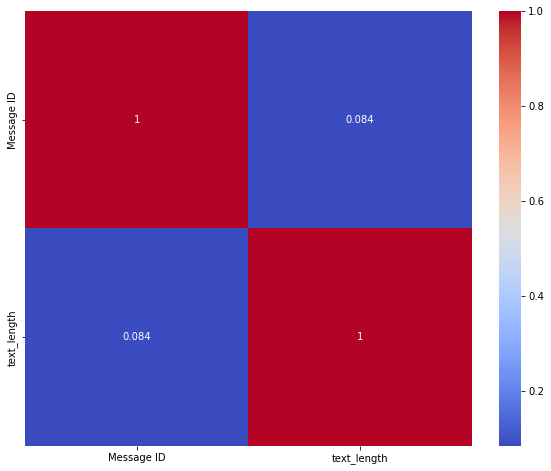

In [24]:
plt.figure(figsize=(10,8))
corr_mx=cleaned_spam_data.corr()
sns.heatmap(corr_mx,annot=True,cmap='coolwarm')
plt.show()

# Step 4: Model Training

In [25]:
#intiate countvectroizer
countvec=CountVectorizer(ngram_range=(1,4),
                        stop_words='english',
                        strip_accents='unicode',
                        max_features=1000)


In [26]:
# Combine 'Subject' and 'Message' columns into a single text column
text_data = cleaned_spam_data['Subject'] + " " + cleaned_spam_data['Message']

# Initialize CountVectorizer
#countvec = CountVectorizer()

# Fit and transform to create bag-of-words (bow)
bow = countvec.fit_transform(text_data)

# Set X and Y for model training
X = bow
Y = cleaned_spam_data['Spam/Ham']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Multinomial Naive Bayes model
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

# Predictions
y_pred = mnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix: ", confusion_matrix(y_test,y_pred))
print("Confusion matrix: ", classification_report(y_test,y_pred))

Accuracy: 0.9608879492600423
Confusion matrix:  [[3107  200]
 [  59 3256]]
Confusion matrix:                precision    recall  f1-score   support

         ham       0.98      0.94      0.96      3307
        spam       0.94      0.98      0.96      3315

    accuracy                           0.96      6622
   macro avg       0.96      0.96      0.96      6622
weighted avg       0.96      0.96      0.96      6622



In [28]:
cleaned_spam_data.head(50)

,Message ID,Subject,Message,Spam/Ham,Date,text_length,text_len
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,24,4282
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,28,38
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,10,1171
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,25,1124
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14,24,534
6,6,meter 1517 - jan 1999,"george ,\ni need the following done :\njan 13\...",ham,1999-12-14,21,411
7,7,duns number changes,fyi\n- - - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,19,1375
8,8,king ranch,there are two fields of gas that i am having d...,ham,1999-12-14,10,1616
9,9,re : entex transistion,thanks so much for the memo . i would like to ...,ham,1999-12-14,22,3039
10,10,entex transistion,the purpose of the email is to recap the kicko...,ham,1999-12-14,17,1734


In [34]:
message_new=['fyi - see note below - already done .\nstella\...','there are two fields of gas that i am having d','i"m sorry , did we discuss bmc ? ? ? .\nlee .','huntsville / woodlands / conroe 11500 by 8 day.']
subject_new=['re : best guess right now . . . . should go up..','98 - 1052 ( pasadena plant phillips ) and 98 -','potential well head - january 2000','ua 4 - meter 1441 for 11 / 97 - falfurrias']
new_message_bow=countvec.transform(message_new)
new_subject_bow=countvec.transform(subject_new)
prediction_message=mnb.predict(new_message_bow)
prediction_subject=mnb.predict(new_subject_bow)
print(f'Prediction of Message: {prediction_message}')
print(f'Prediction of Subject: {prediction_subject}')

Prediction of Message: ['ham' 'ham' 'ham' 'spam']
Prediction of Subject: ['spam' 'ham' 'ham' 'ham']


# Summary

Based on the results, 96 % you can conclude that the Multinomial Naive Bayes model is highly effective and accurate in predicting whether a message is "Spam" or "Ham". The model demonstrates excellent precision, recall, and F1-scores for both classes, which means it is reliable in real-world applications.

- Given these results, the model is highly effective and can be confidently deployed for real-world email or message filtering tasks. Regular monitoring and retraining with new data will help maintain its high performance over time.